In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv.zip", encoding="ISO-8859-1")

In [3]:
cols = ["target", "ids", "date", "flag", "user", "text"]
data = pd.read_csv("training.1600000.processed.noemoticon.csv.zip", names=cols, encoding="ISO-8859-1")

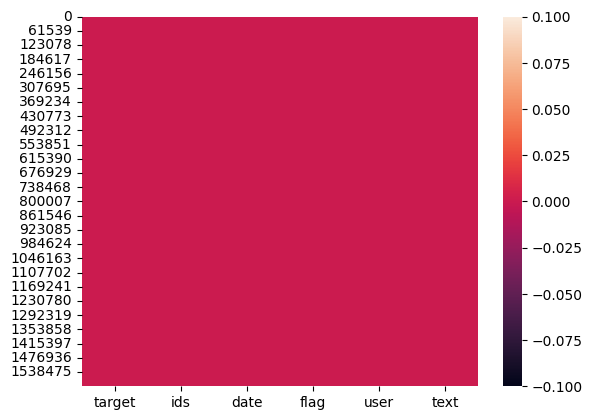

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [4]:
sns.heatmap(data.isnull())
plt.show()


data.isnull().sum()

In [5]:
data = data.drop(["ids", "user", "flag"], axis=1)


In [6]:
data["target"].replace({4:1}, inplace= True)
data["target"] = data["target"].astype("float64")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6192\1924369486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["target"].replace({4:1}, inplace= True)


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
post_stem = PorterStemmer()
def stemming(content):
    stm_cont = re.sub('[^a-zA-Z]', ' ', content)
    stm_cont = stm_cont.lower().split()
    stm_cont = [post_stem.stem(word) for word in stm_cont if not word in stopwords.words('english')]
    return ' '.join(stm_cont)

In [10]:
data["stm_cont"] = data["text"].apply(stemming)

In [ ]:
x = data.drop(["target"], axis=1)
y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train["stm_cont"].astype(str))
X_test = vectorizer.transform(x_test["stm_cont"].astype(str))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
result = accuracy_score(y_test, y_pred)
print(result)

In [ ]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)